In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from moviepy import VideoFileClip
from pathlib import Path

In [32]:
input_video = Path('./people-walking.mp4')
print("Exists:", input_video.exists())

Exists: True


In [33]:
source = input_video
video_cap = cv2.VideoCapture(source)
if (video_cap.isOpened() == False):
    print("Error opening video stream or file")

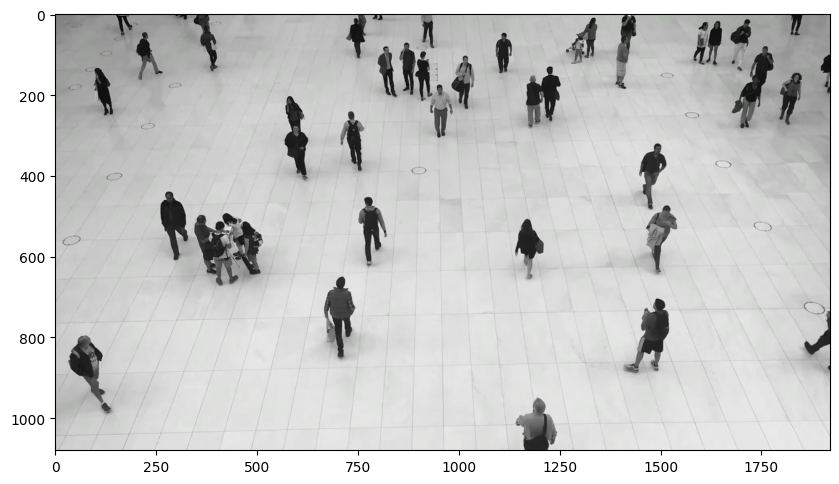

In [34]:
ret, frame = video_cap.read()
plt.figure(figsize = (10,8))
plt.imshow(frame[...,::-1])
plt.show()

## Video Writer Object

In [35]:
frame_w = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

frame_fps = float(video_cap.get(cv2.CAP_PROP_FPS))
n_frames = int(video_cap.get(cv2.CAP_PROP_FRAME_COUNT))


fourcc_avi = cv2.VideoWriter_fourcc('M','J','P','G')
fourcc_mp4 = cv2.VideoWriter_fourcc(*'mp4v')

file_out_avi = 'video_out.avi'
file_out_mp4 = 'video_out.mp4'

slow_frame_fps = int(frame_fps/3)

out_avi = cv2.VideoWriter(file_out_avi, fourcc_avi, slow_frame_fps, (frame_w, frame_h))
out_mp4 = cv2.VideoWriter(file_out_mp4, fourcc_mp4, slow_frame_fps, (frame_w, frame_h))

print("=== Video Info ===")
print(f"Resolution: {frame_w} x {frame_h}")
print(f"FPS (input): {frame_fps:.2f}")
print(f"Frames (input): {n_frames}")

dur_in = n_frames / frame_fps
dur_out = n_frames / slow_frame_fps

print(f"Duration (input):  {dur_in:.2f} s")
print(f"Duration (output): {dur_out:.2f} s  (same frames, lower FPS)")
print(f"Slowdown factor:   {dur_out/dur_in:.2f}x")


=== Video Info ===
Resolution: 1920 x 1080
FPS (input): 25.00
Frames (input): 341
Duration (input):  13.64 s
Duration (output): 42.62 s  (same frames, lower FPS)
Slowdown factor:   3.12x


In [36]:
def drawBannerText(frame, text, banner_height_percent = 0.05, text_color = (0, 255, 0)):
    
    banner_height = int(banner_height_percent * frame.shape[0])
    cv2.rectangle(frame, (0,0), (frame.shape[1], banner_height), (0,0,0), thickness=-1)

    left_offset = 20
    location = (left_offset, int(5 + (banner_height_percent * frame.shape[0])/2))
    fontScale = 1.5
    fontThickness = 2
    cv2.putText(frame, text, location, cv2.FONT_HERSHEY_PLAIN, fontScale, text_color, fontThickness, cv2.LINE_AA)

In [37]:
frame_count = 0
assets_dir = Path("assets")
assets_dir.mkdir(exist_ok=True)
save_frames_at = {10, 60, 120}

while True:

    ok, frame = video_cap.read()
    if not ok:
        break

    frame_count += 1

    if frame_count in save_frames_at:
        cv2.imwrite(str(assets_dir / f"banner_{frame_count:04d}.png"), frame)

    msec = video_cap.get(cv2.CAP_PROP_POS_MSEC)

    text = f"Frame: {frame_count}, FPS: {slow_frame_fps}, MSEC: {msec}"

    drawBannerText(frame, text)

    out_avi.write(frame)
    out_mp4.write(frame)

In [38]:
video_cap.release()
out_avi.release()
out_mp4.release()

In [39]:
out_mp4_path = Path(file_out_mp4)
out_avi_path = Path(file_out_avi)

print("   Size (MB):", round(out_mp4_path.stat().st_size/(1024**2), 2) if out_mp4_path.exists() else "N/A")
print("   Size (MB):", round(out_avi_path.stat().st_size/(1024**2), 2) if out_avi_path.exists() else "N/A")


   Size (MB): 11.6
   Size (MB): 35.78
